# Cat classifier using Logistic Regression
## We will be using numpy and implementing everything from scratch

In [1]:
import h5py
import copy
import scipy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Loading the Dataset

In [3]:
train_file = 'train_catvnoncat.h5'
test_file = 'test_catvnoncat.h5'
train_set = h5py.File(train_file,'r')
test_set = h5py.File(test_file,'r')
print('Training set:')
for key in train_set.keys(): #printing the classes
    print(key)
print('Testing set:')
for key in test_set.keys(): #printing the classes
    print(key)

Training set:
list_classes
train_set_x
train_set_y
Testing set:
list_classes
test_set_x
test_set_y


In [7]:
train_set_org_x = np.array(train_set['train_set_x'][:])
test_set_org_x = np.array(test_set['test_set_x'][:])
train_set_org_y = np.array(train_set['train_set_y'][:])
test_set_org_y = np.array(test_set['test_set_y'][:])
#gather some information about the shapes of our data
print('Train set| X: {}, Y: {}'.format(train_set_org_x.shape, train_set_org_y.shape))
print('Test  set| X: {}, Y: {}'.format(test_set_org_x.shape, test_set_org_y.shape))

Train set| X: (209, 64, 64, 3), Y: (209,)
Test  set| X: (50, 64, 64, 3), Y: (50,)


In [8]:
classes = np.array(train_set['list_classes'][:])
for classs in classes:
    print(classs)

b'non-cat'
b'cat'


In [9]:
#changing the shapes to be (pixels,m)
train_set_x = train_set_org_x.reshape(-1,train_set_org_x.shape[0])
train_set_y = train_set_org_y.reshape(-1,train_set_org_y.shape[0])
test_set_x = test_set_org_x.reshape(-1,test_set_org_x.shape[0])
test_set_y = test_set_org_y.reshape(-1,test_set_org_y.shape[0])
print('shape of train set x is {}'.format(train_set_x .shape))
print('shape of train set y is {}'.format(train_set_y .shape))
print('shape of test set x is {}'.format(test_set_x .shape))
print('shape of test set x is {}'.format(test_set_y .shape))

shape of train set x is (12288, 209)
shape of train set y is (1, 209)
shape of test set x is (12288, 50)
shape of test set x is (1, 50)


In [10]:
#standarizing the data set
train_set_x = train_set_x/255
test_set_x = test_set_x/255

img no. 10 is labeled as a non cat


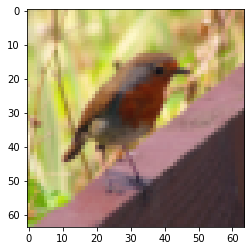

In [11]:
index = 10
plt.imshow(train_set_org_x[index])
if train_set_y[0,index] == 0:
    label = 'non cat'
else:
    label = 'cat'
print('img no. {} is labeled as a {}'.format(index, label))

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [18]:
def initialize_with_zeros(dim):
    #intialize the weights
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [13]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    #forward propagation
    A = sigmoid(np.dot(w.T,X) + b)
    J = (-1/m)*np.sum( np.multiply(Y, np.log(A)) + np.multiply((1-Y), np.log(1-A)) )
    
    #backward propagation
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    grads = {'dw':dw, 'db':db}
    return grads,J

In [14]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    
    for i in range(num_iterations):
        grads,J = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w-dw*learning_rate
        b = b-db*learning_rate
        
    params = {'w':w, 'b':b}
    grads = {'dw':dw, 'db':db}
    
    return params,grads,J

In [15]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(m):
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    return Y_prediction

## Putting the model together

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params['w']
    b = params['b']
    
    Y_prediction_train =  predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
  
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Accuracy

In [20]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x,
                                  test_set_y, num_iterations=2000, learning_rate=0.01)

train accuracy: 75.59808612440192 %
test accuracy: 62.0 %


## Testing with more images

y = 1.0, your algorithm predicts a "cat" picture.


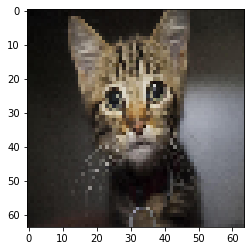

In [21]:
my_image = "cat.jpg"   

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((64, 64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")